#**Mounting the drive to colab and importing necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000
pd. set_option('display.max_rows', 300) # or 1000

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/T/H2HBABBA2202.csv')

**Basic info about the dataset before preprocessing**

In [ ]:
#print first 10 rows
df.head(10) 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707822,PUBLI llc,2019-10-04 00:00:00,2019.0,1.929898e+09,2019-09-19,20190919,20190919,20191004.0,USD,RV,1.0,NaN,18175.79,20190919.0,NAA8,1.929898e+09,0
1,U001,0200780383,MEIJ foundation,2019-05-23 00:00:00,2019.0,1.929276e+09,2019-05-08,20190507,20190508,20190523.0,USD,RV,1.0,NaN,2265.33,20190508.0,NAA8,1.929276e+09,0
2,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930823e+09,2020-04-25,20200424,20200425,20200510.0,USD,RV,1.0,NaN,48706.82,20200425.0,NAH4,1.930823e+09,1
3,U001,200769623,WAL-MAR corporation,2019-04-15 00:00:00,2019.0,1.929069e+09,2019-04-04,20190402,20190404,20190419.0,USD,RV,1.0,NaN,4742.40,20190404.0,NAH4,1.929069e+09,0
4,U001,0200779906,BOZZU corporation,2019-10-10 00:00:00,2019.0,1.929907e+09,2019-09-24,20190920,20190924,20191009.0,USD,RV,1.0,NaN,18197.21,20190924.0,NAA8,1.929907e+09,0
5,U001,0200592182,DECA corporation,2020-02-10 00:00:00,2020.0,1.930509e+09,2020-02-10,20200210,20200210,20200208.0,USD,RV,1.0,NaN,8226.78,20200201.0,NAM1,1.930509e+09,0
6,CA02,0100012991,CJR WH co,2019-07-08 00:00:00,2019.0,2.960556e+09,2019-06-21,20190621,20190621,20190702.0,CAD,RV,1.0,NaN,10566.98,20190622.0,CA10,2.960556e+09,0
7,U001,0200353024,DECA in,2019-04-26 00:00:00,2019.0,1.929174e+09,2019-04-19,20190419,20190419,20190426.0,USD,RV,1.0,NaN,14863.85,20190416.0,NAM2,1.929174e+09,0
8,CA02,100012991,CJR WH corporation,NaN,2020.0,2.960634e+09,2020-05-05,20200506,20200505,20200517.0,CAD,RV,1.0,NaN,44533.51,20200507.0,CA10,2.960634e+09,1
9,U001,200739006,AL foundation,2019-07-11 00:00:00,2019.0,1.929553e+09,2019-06-28,20190627,20190628,20190713.0,USD,RV,1.0,NaN,35919.24,20190628.0,NAA8,1.929553e+09,0


In [ ]:
#get info about null value count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
#total no. of rows and columns
df.shape

(50000, 19)

In [ ]:
#transposing the dataframe
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,...,49850,49851,49852,49853,49854,49855,49856,49857,49858,49859,49860,49861,49862,49863,49864,49865,49866,49867,49868,49869,49870,49871,49872,49873,49874,49875,49876,49877,49878,49879,49880,49881,49882,49883,49884,49885,49886,49887,49888,49889,49890,49891,49892,49893,49894,49895,49896,49897,49898,49899,49900,49901,49902,49903,49904,49905,49906,49907,49908,49909,49910,49911,49912,49913,49914,49915,49916,49917,49918,49919,49920,49921,49922,49923,49924,49925,49926,49927,49928,49929,49930,49931,49932,49933,49934,49935,49936,49937,49938,49939,49940,49941,49942,49943,49944,49945,49946,49947,49948,49949,49950,49951,49952,49953,49954,49955,49956,49957,49958,49959,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,U001,U001,U001,U001,CA02,U001,CA02,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U005,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U013,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U002,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,CA02,U001,U013,U001,U001,U001,U001,U013,U001,U001,CA02,U001,CA02,U001,U001,CA02,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U013,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001
cust_number,0200707822,0200780383,0200769623,200769623,0200779906,0200592182,0100012991,0200353024,100012991,200739006,0200769623,0200759878,0200748108,0140106408,0200769623,0200712187,0200769623,0200786288,0200560331,CCU013,0200418007,0200778870,CCU002,0200729942,0200769623,0200772595,0200794332,0200772670,0200769623,200769623,0200794332,0200592182,0200761734,0200759878,0200744019,200778870,0200786288,0200772670,0200772670,0200799367,0200592182,0200769623,0200759878,0200761734,0200780383,0200769623,0200793568,0200759878,0200759878,CCU013,140106408,0200726979,0200974851,0200764515,200769623,0200230690,0200750051,0200769623,0200769623,100025658,0200793830,0140104409,0200759878,0200769623,0200920735,200712836,0200769623,0200769623,0200974851,0200769623,0200704858,0200769623,0200707822,0200726979,200762301,0200152991,0200769623,0200764795,0200416837,0200920735,CCU013,0200704045,0200739534,0200736337,CCCA02,0200721530,0200769623,0200769623,0200769623,0200418007,0200337148,0200744019,0200739534,0200148860,0200769623,0200769623,140104409,140101584,0200769623,0140104240,0200759

In [ ]:
#checking the uniqueness of elements within a column
df['posting_id'].nunique()

1

#**PREPROCESSING THE DATA**

In [ ]:
#dropping constant valued column
df.drop('posting_id', axis='columns', inplace=True) 

In [ ]:
#dropping null-valued column 'area_business'
df.drop('area_business', axis='columns', inplace=True) 

In [ ]:
#dropping duplicate non-normalised column
df.drop('document_create_date', axis='columns', inplace=True) 

In [ ]:
#finding our correlation between columns to ensure there's no duplicate columns
df.corr(method ='pearson')

,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.017810,0.984773,0.989448,-0.001532,0.985096,-0.015477,0.757481
doc_id,-0.017810,1.000000,-0.018148,-0.019655,0.175631,-0.015972,1.000000,-0.013497
document_create_date.1,0.984773,-0.018148,1.000000,0.980517,-0.000082,0.999282,-0.014271,0.767498
due_in_date,0.989448,-0.019655,0.980517,1.000000,-0.000554,0.981222,-0.015777,0.757698
total_open_amount,-0.001532,0.175631,-0.000082,-0.000554,1.000000,0.000596,0.191543,0.000314
baseline_create_date,0.985096,-0.015972,0.999282,0.981222,0.000596,1.000000,-0.011933,0.767215
invoice_id,-0.015477,1.000000,-0.014271,-0.015777,0.191543,-0.011933,1.000000,-0.011731
isOpen,0.757481,-0.013497,0.767498,0.757698,0.000314,0.767215,-0.011731,1.000000


In [ ]:
#dropping duplicate column with almost same correlation value (0.99 w.r.t. 'document_create_date.1')
df.drop('baseline_create_date', axis='columns', inplace=True) 
df.drop('posting_date', axis='columns', inplace=True)

#dropping duplicate column with almost same correlation value (1.00 w.r.t. 'doc_id')
df.drop('invoice_id', axis='columns', inplace=True) 

In [ ]:
#now we drop all the duplicate values in the rows
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#checking the dataset before splitting it further
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,0200707822,PUBLI llc,2019-10-04 00:00:00,2019.0,1.929898e+09,20190919,20191004.0,USD,RV,18175.79,NAA8,0
1,U001,0200780383,MEIJ foundation,2019-05-23 00:00:00,2019.0,1.929276e+09,20190508,20190523.0,USD,RV,2265.33,NAA8,0
2,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930823e+09,20200425,20200510.0,USD,RV,48706.82,NAH4,1
3,U001,200769623,WAL-MAR corporation,2019-04-15 00:00:00,2019.0,1.929069e+09,20190404,20190419.0,USD,RV,4742.40,NAH4,0
4,U001,0200779906,BOZZU corporation,2019-10-10 00:00:00,2019.0,1.929907e+09,20190924,20191009.0,USD,RV,18197.21,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200331749,SYSC corporation,2019-04-23 00:00:00,2019.0,1.928967e+09,20190320,20190409.0,USD,RV,1884.47,NAD1,0
49996,U001,0200769623,WAL-MAR llc,2019-09-23 00:00:00,2019.0,1.929862e+09,20190912,20190927.0,USD,RV,51450.59,NAH4,0
49997,U001,0200774000,RALEY trust,2019-04-11 00:00:00,2019.0,1.929044e+09,20190328,20190412.0,USD,RV,89734.43,NAA8,0
49998,U001,CCU013,KRAFT F corporation,2019-09-27 00:00:00,2019.0,1.929726e+09,20190811,20190811.0,USD,RV,106139.88,NAX2,0


**Changing the format to date-time format of required coulumns**

In [ ]:
#converting the dates in date-time format
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%m%d')

df['clear_date']=pd.to_datetime(df['clear_date']) #removes time from the date

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,USD,RV,18175.79,NAA8,0
1,U001,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,USD,RV,2265.33,NAA8,0
2,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1
3,U001,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,USD,RV,4742.40,NAH4,0
4,U001,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,USD,RV,18197.21,NAA8,0


In [ ]:
#sorting on the basis of 'document_create_date.1'
df.sort_values(by='document_create_date.1', ascending=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
20719,CA02,0140104409,LOB associates,2019-12-27,2019.0,9.500000e+09,2018-06-26,2018-07-06,CAD,X2,279.60,CA10,0
31355,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,RV,146.15,NAU5,0
34911,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2019-01-14,USD,RV,32506.23,NAH4,0
29219,U001,0200762950,HAR in,2019-01-14,2019.0,1.928542e+09,2018-12-30,2019-01-14,USD,RV,73743.52,NAA8,0
22144,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2019-01-14,USD,RV,93305.55,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38617,CA02,0100029649,LES ENTRE corporation,NaT,2020.0,2.960636e+09,2020-05-18,2020-05-29,CAD,RV,18216.36,CA10,1
28113,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-06-02,USD,RV,16099.20,NAA8,1
9593,CA02,0140105785,SHOPPE in,NaT,2020.0,2.960636e+09,2020-05-19,2020-05-29,CAD,RV,1373.60,CA10,1
8994,U001,0200464724,LAND,NaT,2020.0,1.930914e+09,2020-05-19,2020-05-29,USD,RV,194864.00,NA10,1


**Finding the delay (days taken until payment is made)**

In [ ]:
#creating a new column in "df" dataset before splitting into train, val and test set
df['delay']= df['clear_date'] - df['due_in_date']

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,USD,RV,18175.79,NAA8,0,0 days
1,U001,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,USD,RV,2265.33,NAA8,0,0 days
2,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,NaT
3,U001,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,USD,RV,4742.40,NAH4,0,-4 days
4,U001,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,USD,RV,18197.21,NAA8,0,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200331749,SYSC corporation,2019-04-23,2019.0,1.928967e+09,2019-03-20,2019-04-09,USD,RV,1884.47,NAD1,0,14 days
49996,U001,0200769623,WAL-MAR llc,2019-09-23,2019.0,1.929862e+09,2019-09-12,2019-09-27,USD,RV,51450.59,NAH4,0,-4 days
49997,U001,0200774000,RALEY trust,2019-04-11,2019.0,1.929044e+09,2019-03-28,2019-04-12,USD,RV,89734.43,NAA8,0,-1 days
49998,U001,CCU013,KRAFT F corporation,2019-09-27,2019.0,1.929726e+09,2019-08-11,2019-08-11,USD,RV,106139.88,NAX2,0,47 days


**Removing the datapoints where the target (clear_date) value is null**

In [ ]:
#creating two new data sets
#1. new_df
new_df = df[df.clear_date.isnull()==False]

#2. null_df (for null values)
null_df = df[df.clear_date.isnull()==True]

In [ ]:
new_df.shape, null_df.shape

((39145, 14), (9707, 14))

In [ ]:
new_df.isna().sum() #no null values present

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
cust_payment_terms        0
isOpen                    0
delay                     0
dtype: int64

In [ ]:
#merging small-valued columns together as 'others'
for col in new_df.columns:
    if new_df[col].nunique()<= 12:
        print(new_df[col].value_counts())
        print('----------------------------------')  

U001    35482
CA02     3035
U013      494
U002      122
U005       12
Name: business_code, dtype: int64
----------------------------------
2019.0    34078
2020.0     5067
Name: buisness_year, dtype: int64
----------------------------------
USD    36107
CAD     3038
Name: invoice_currency, dtype: int64
----------------------------------
RV    39135
X2       10
Name: document type, dtype: int64
----------------------------------
0    39145
Name: isOpen, dtype: int64
----------------------------------


In [ ]:
new_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,USD,RV,18175.79,NAA8,0,0 days
1,U001,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,USD,RV,2265.33,NAA8,0,0 days
3,U001,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,USD,RV,4742.40,NAH4,0,-4 days
4,U001,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,USD,RV,18197.21,NAA8,0,1 days
5,U001,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,2020-02-10,2020-02-08,USD,RV,8226.78,NAM1,0,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200331749,SYSC corporation,2019-04-23,2019.0,1.928967e+09,2019-03-20,2019-04-09,USD,RV,1884.47,NAD1,0,14 days
49996,U001,0200769623,WAL-MAR llc,2019-09-23,2019.0,1.929862e+09,2019-09-12,2019-09-27,USD,RV,51450.59,NAH4,0,-4 days
49997,U001,0200774000,RALEY trust,2019-04-11,2019.0,1.929044e+09,2019-03-28,2019-04-12,USD,RV,89734.43,NAA8,0,-1 days
49998,U001,CCU013,KRAFT F corporation,2019-09-27,2019.0,1.929726e+09,2019-08-11,2019-08-11,USD,RV,106139.88,NAX2,0,47 days


**Splitting the data into null and not null valued sub-sets on the basis of target column**

In [ ]:
#X --> contains the dataframe without the target
X = new_df.drop('delay',axis=1)

#y --> contains only the target value 
y = new_df['delay']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_inter_test, y_train, y_inter_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_inter_test, y_inter_test, test_size=0.5, random_state=0, shuffle=False)

In [ ]:
X_train.shape , X_val.shape , X_test.shape

((27401, 13), (5872, 13), (5872, 13))

#**EDA**

In [ ]:
#y_train has only delay column
y_train 

0        0 days
1        0 days
3       -4 days
4        1 days
5        2 days
          ...  
34685   41 days
34686   -1 days
34687    0 days
34688   -3 days
34689    1 days
Name: delay, Length: 27401, dtype: timedelta64[ns]

In [ ]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 0 to 34689
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27401 non-null  object        
 1   cust_number             27401 non-null  object        
 2   name_customer           27401 non-null  object        
 3   clear_date              27401 non-null  datetime64[ns]
 4   buisness_year           27401 non-null  float64       
 5   doc_id                  27401 non-null  float64       
 6   document_create_date.1  27401 non-null  datetime64[ns]
 7   due_in_date             27401 non-null  datetime64[ns]
 8   invoice_currency        27401 non-null  object        
 9   document type           27401 non-null  object        
 10  total_open_amount       27401 non-null  float64       
 11  cust_payment_terms      27401 non-null  object        
 12  isOpen                  27401 non-null  int64 

In [ ]:
X_train 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
0,U001,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,USD,RV,18175.79,NAA8,0
1,U001,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,USD,RV,2265.33,NAA8,0
3,U001,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,USD,RV,4742.40,NAH4,0
4,U001,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,USD,RV,18197.21,NAA8,0
5,U001,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,2020-02-10,2020-02-08,USD,RV,8226.78,NAM1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,U001,0200152991,JET foundation,2019-06-12,2019.0,1.929159e+09,2019-04-17,2019-05-02,USD,RV,449.08,NAA8,0
34686,U001,0200770567,LABAT llc,2019-05-30,2019.0,1.929320e+09,2019-05-16,2019-05-31,USD,RV,41089.78,NAA8,0
34687,U001,0200726979,BJ'S co,2019-07-08,2019.0,1.929542e+09,2019-06-23,2019-07-08,USD,RV,552.82,NAA8,0
34688,U001,200769623,WAL-MAR us,2019-07-15,2019.0,1.929567e+09,2019-07-03,2019-07-18,USD,RV,36836.54,NAH4,0


In [ ]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,0,U001,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,USD,RV,18175.79,NAA8,0,0 days
1,1,U001,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,USD,RV,2265.33,NAA8,0,0 days
2,3,U001,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,USD,RV,4742.40,NAH4,0,-4 days
3,4,U001,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,USD,RV,18197.21,NAA8,0,1 days
4,5,U001,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,2020-02-10,2020-02-08,USD,RV,8226.78,NAM1,0,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27396,34685,U001,0200152991,JET foundation,2019-06-12,2019.0,1.929159e+09,2019-04-17,2019-05-02,USD,RV,449.08,NAA8,0,41 days
27397,34686,U001,0200770567,LABAT llc,2019-05-30,2019.0,1.929320e+09,2019-05-16,2019-05-31,USD,RV,41089.78,NAA8,0,-1 days
27398,34687,U001,0200726979,BJ'S co,2019-07-08,2019.0,1.929542e+09,2019-06-23,2019-07-08,USD,RV,552.82,NAA8,0,0 days
27399,34688,U001,200769623,WAL-MAR us,2019-07-15,2019.0,1.929567e+09,2019-07-03,2019-07-18,USD,RV,36836.54,NAH4,0,-3 days


In [ ]:
y_train=y_train.dt.days
y_val=y_val.dt.days
y_test=y_test.dt.days

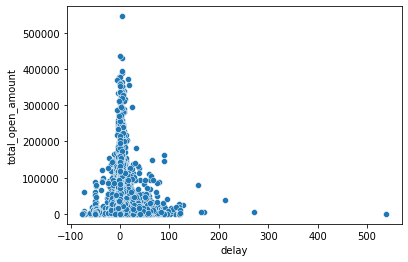

In [ ]:
#scatter plot
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

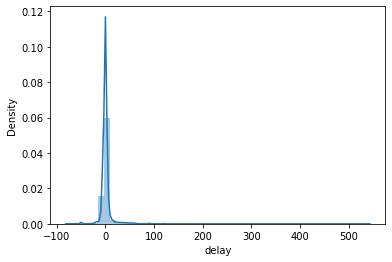

In [ ]:
#distribution plot
sns.distplot(y_train)

In [ ]:
#y_train['delay'].astype('timedelta64[D]')
y_train

0         0
1         0
3        -4
4         1
5         2
         ..
34685    41
34686    -1
34687     0
34688    -3
34689     1
Name: delay, Length: 27401, dtype: int64

#**FEATURE ENGINEERING**

In [ ]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 0 to 34689
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27401 non-null  object        
 1   cust_number             27401 non-null  object        
 2   name_customer           27401 non-null  object        
 3   clear_date              27401 non-null  datetime64[ns]
 4   buisness_year           27401 non-null  float64       
 5   doc_id                  27401 non-null  float64       
 6   document_create_date.1  27401 non-null  datetime64[ns]
 7   due_in_date             27401 non-null  datetime64[ns]
 8   invoice_currency        27401 non-null  object        
 9   document type           27401 non-null  object        
 10  total_open_amount       27401 non-null  float64       
 11  cust_payment_terms      27401 non-null  object        
 12  isOpen                  27401 non-null  int64 

In [ ]:
#document type
from sklearn.preprocessing import LabelEncoder
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_train['document type'])
X_train['document_type_enc'] = document_type_encoder.transform(X_train['document type'])
X_val['document_type_enc'] = document_type_encoder.transform(X_val['document type'])
X_test['document_type_enc'] = document_type_encoder.transform(X_test['document type'])

In [ ]:
X_train[['document_type_enc','document type']]

,document_type_enc,document type
0,0,RV
1,0,RV
3,0,RV
4,0,RV
5,0,RV
...,...,...
34685,0,RV
34686,0,RV
34687,0,RV
34688,0,RV


In [ ]:
X_train['document type'].nunique()

2

In [ ]:
X_test[['document_type_enc','document type']]

,document_type_enc,document type
42257,0,RV
42258,0,RV
42261,0,RV
42262,0,RV
42263,0,RV
...,...,...
49995,0,RV
49996,0,RV
49997,0,RV
49998,0,RV


In [ ]:
#since we have created doc type encoder, now we can drop the ``not a number`` column
X_train.drop(['document type'], axis=1, inplace=True)
X_val.drop(['document type'], axis=1, inplace=True)
X_test.drop(['document type'], axis=1, inplace=True)

In [ ]:
#checking the data type of new column
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 0 to 34689
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27401 non-null  object        
 1   cust_number             27401 non-null  object        
 2   name_customer           27401 non-null  object        
 3   clear_date              27401 non-null  datetime64[ns]
 4   buisness_year           27401 non-null  float64       
 5   doc_id                  27401 non-null  float64       
 6   document_create_date.1  27401 non-null  datetime64[ns]
 7   due_in_date             27401 non-null  datetime64[ns]
 8   invoice_currency        27401 non-null  object        
 9   total_open_amount       27401 non-null  float64       
 10  cust_payment_terms      27401 non-null  object        
 11  isOpen                  27401 non-null  int64         
 12  document_type_enc       27401 non-null  int64 

In [ ]:
#business_code
from sklearn.preprocessing import LabelEncoder  
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [ ]:
X_test[['business_code_enc','business_code']]

,business_code_enc,business_code
42257,4,U013
42258,1,U001
42261,1,U001
42262,1,U001
42263,1,U001
...,...,...
49995,1,U001
49996,1,U001
49997,1,U001
49998,1,U001


In [ ]:
#since we have created business_code encoder, now we can drop the ``not a number`` column
X_train.drop(['business_code'], axis=1, inplace=True)
X_val.drop(['business_code'],axis=1, inplace=True)
X_test.drop(['business_code'],axis=1, inplace=True)

In [ ]:
#invoice_currency
from sklearn.preprocessing import LabelEncoder  
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_enc'] =invoice_currency_encoder.transform(X_train['invoice_currency'])
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [ ]:
X_test[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
42257,1,USD
42258,1,USD
42261,1,USD
42262,1,USD
42263,1,USD
...,...,...
49995,1,USD
49996,1,USD
49997,1,USD
49998,1,USD


In [ ]:
X_train.drop(['cust_payment_terms','isOpen','invoice_currency'], axis=1, inplace=True)
X_val.drop(['cust_payment_terms','isOpen','invoice_currency'], axis=1, inplace=True)
X_test.drop(['cust_payment_terms','isOpen','invoice_currency'], axis=1, inplace=True)

In [ ]:
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc
0,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,2019-10-04,18175.79,0,1,1
1,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2019-05-23,2265.33,0,1,1
3,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,2019-04-19,4742.40,0,1,1
4,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,2019-10-09,18197.21,0,1,1
5,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,2020-02-10,2020-02-08,8226.78,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
34685,0200152991,JET foundation,2019-06-12,2019.0,1.929159e+09,2019-04-17,2019-05-02,449.08,0,1,1
34686,0200770567,LABAT llc,2019-05-30,2019.0,1.929320e+09,2019-05-16,2019-05-31,41089.78,0,1,1
34687,0200726979,BJ'S co,2019-07-08,2019.0,1.929542e+09,2019-06-23,2019-07-08,552.82,0,1,1
34688,200769623,WAL-MAR us,2019-07-15,2019.0,1.929567e+09,2019-07-03,2019-07-18,36836.54,0,1,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 0 to 34689
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             27401 non-null  object        
 1   name_customer           27401 non-null  object        
 2   clear_date              27401 non-null  datetime64[ns]
 3   buisness_year           27401 non-null  float64       
 4   doc_id                  27401 non-null  float64       
 5   document_create_date.1  27401 non-null  datetime64[ns]
 6   due_in_date             27401 non-null  datetime64[ns]
 7   total_open_amount       27401 non-null  float64       
 8   document_type_enc       27401 non-null  int64         
 9   business_code_enc       27401 non-null  int64         
 10  invoice_currency_enc    27401 non-null  int64         
dtypes: datetime64[ns](3), float64(3), int64(3), object(2)
memory usage: 2.5+ MB


In [ ]:
#MAKING SEPARATE COLUMNS FOR DAY, MONTH AND YEAR `due_in_date` 

X_train['in-weekday'] = X_train['due_in_date'].dt.weekday #train set
X_train['in-day'] = X_train['due_in_date'].dt.day
X_train['in-month'] = X_train['due_in_date'].dt.month
X_train['in-year'] = X_train['due_in_date'].dt.year

X_val['in-weekday'] = X_val['due_in_date'].dt.weekday #val set
X_val['in-day'] = X_val['due_in_date'].dt.day
X_val['in-month'] = X_val['due_in_date'].dt.month
X_val['in-year'] = X_val['due_in_date'].dt.year

X_test['in-weekday'] = X_test['due_in_date'].dt.weekday #test set
X_test['in-day'] = X_test['due_in_date'].dt.day
X_test['in-month'] = X_test['due_in_date'].dt.month
X_test['in-year'] = X_test['due_in_date'].dt.year

In [ ]:
#dropping due_in_date column since it is not in int format
X_train.drop(['due_in_date'], axis=1, inplace=True)
X_val.drop(['due_in_date'],axis=1, inplace=True)
X_test.drop(['due_in_date'],axis=1, inplace=True)

In [ ]:
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year
0,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,2019-09-19,18175.79,0,1,1,4,4,10,2019
1,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2019-05-08,2265.33,0,1,1,3,23,5,2019
3,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,2019-04-04,4742.40,0,1,1,4,19,4,2019
4,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,2019-09-24,18197.21,0,1,1,2,9,10,2019
5,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,2020-02-10,8226.78,0,1,1,5,8,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,0200152991,JET foundation,2019-06-12,2019.0,1.929159e+09,2019-04-17,449.08,0,1,1,3,2,5,2019
34686,0200770567,LABAT llc,2019-05-30,2019.0,1.929320e+09,2019-05-16,41089.78,0,1,1,4,31,5,2019
34687,0200726979,BJ'S co,2019-07-08,2019.0,1.929542e+09,2019-06-23,552.82,0,1,1,0,8,7,2019
34688,200769623,WAL-MAR us,2019-07-15,2019.0,1.929567e+09,2019-07-03,36836.54,0,1,1,3,18,7,2019


In [ ]:
#MAKING SEPARATE COLUMNS FOR DAY, MONTH AND YEAR `document_create_date.1`

X_train['doc_weekday'] = X_train['document_create_date.1'].dt.weekday #train set
X_train['doc_day'] = X_train['document_create_date.1'].dt.day
X_train['doc_month'] = X_train['document_create_date.1'].dt.month
X_train['doc_year'] = X_train['document_create_date.1'].dt.year

X_val['doc_weekday'] = X_val['document_create_date.1'].dt.weekday #val set
X_val['doc_day'] = X_val['document_create_date.1'].dt.day
X_val['doc_month'] = X_val['document_create_date.1'].dt.month
X_val['doc_year'] = X_val['document_create_date.1'].dt.year

X_test['doc_weekday'] = X_test['document_create_date.1'].dt.weekday #test set
X_test['doc_day'] = X_test['document_create_date.1'].dt.day
X_test['doc_month'] = X_test['document_create_date.1'].dt.month
X_test['doc_year'] = X_test['document_create_date.1'].dt.year

In [ ]:
#dropping document_create_date.1 column since it is not in int format

X_train.drop(['document_create_date.1'], axis=1, inplace=True)
X_val.drop(['document_create_date.1'],axis=1, inplace=True)
X_test.drop(['document_create_date.1'],axis=1, inplace=True)

In [ ]:
X_train

,cust_number,name_customer,clear_date,buisness_year,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
0,0200707822,PUBLI llc,2019-10-04,2019.0,1.929898e+09,18175.79,0,1,1,4,4,10,2019,3,19,9,2019
1,0200780383,MEIJ foundation,2019-05-23,2019.0,1.929276e+09,2265.33,0,1,1,3,23,5,2019,2,8,5,2019
3,200769623,WAL-MAR corporation,2019-04-15,2019.0,1.929069e+09,4742.40,0,1,1,4,19,4,2019,3,4,4,2019
4,0200779906,BOZZU corporation,2019-10-10,2019.0,1.929907e+09,18197.21,0,1,1,2,9,10,2019,1,24,9,2019
5,0200592182,DECA corporation,2020-02-10,2020.0,1.930509e+09,8226.78,0,1,1,5,8,2,2020,0,10,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,0200152991,JET foundation,2019-06-12,2019.0,1.929159e+09,449.08,0,1,1,3,2,5,2019,2,17,4,2019
34686,0200770567,LABAT llc,2019-05-30,2019.0,1.929320e+09,41089.78,0,1,1,4,31,5,2019,3,16,5,2019
34687,0200726979,BJ'S co,2019-07-08,2019.0,1.929542e+09,552.82,0,1,1,0,8,7,2019,6,23,6,2019
34688,200769623,WAL-MAR us,2019-07-15,2019.0,1.929567e+09,36836.54,0,1,1,3,18,7,2019,2,3,7,2019


In [ ]:
#Dropping columns that won't be useful for the machine to predict the output

X_train.drop(['clear_date'], axis =1, inplace=True)
X_train.drop(['buisness_year'], axis=1, inplace=True)

X_val.drop(['clear_date'], axis=1, inplace=True)
X_val.drop(['buisness_year'], axis=1, inplace=True)

X_test.drop(['clear_date'], axis=1, inplace=True)
X_test.drop(['buisness_year'], axis=1, inplace=True)

In [ ]:
#seperate customer_name bc our model isn't able to read string, later on we merge it.

name_train= X_train.drop(['name_customer'], axis=1, inplace=True)
name_val= X_val.drop(['name_customer'], axis=1, inplace=True) 
name_test= X_test.drop(['name_customer'], axis=1, inplace=True) 

In [ ]:
X_train

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
0,0200707822,1.929898e+09,18175.79,0,1,1,4,4,10,2019,3,19,9,2019
1,0200780383,1.929276e+09,2265.33,0,1,1,3,23,5,2019,2,8,5,2019
3,200769623,1.929069e+09,4742.40,0,1,1,4,19,4,2019,3,4,4,2019
4,0200779906,1.929907e+09,18197.21,0,1,1,2,9,10,2019,1,24,9,2019
5,0200592182,1.930509e+09,8226.78,0,1,1,5,8,2,2020,0,10,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,0200152991,1.929159e+09,449.08,0,1,1,3,2,5,2019,2,17,4,2019
34686,0200770567,1.929320e+09,41089.78,0,1,1,4,31,5,2019,3,16,5,2019
34687,0200726979,1.929542e+09,552.82,0,1,1,0,8,7,2019,6,23,6,2019
34688,200769623,1.929567e+09,36836.54,0,1,1,3,18,7,2019,2,3,7,2019


In [ ]:
X_test

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
42257,0140103496,1.991826e+09,25805.78,0,4,1,5,15,6,2019,2,1,5,2019
42258,0200744019,1.929765e+09,2307.31,0,1,1,3,5,9,2019,2,21,8,2019
42261,0200769623,1.929396e+09,9.70,0,1,1,3,13,6,2019,2,29,5,2019
42262,0100031704,1.930087e+09,72943.03,0,1,1,1,19,11,2019,0,4,11,2019
42263,0200769623,1.930558e+09,23094.13,0,1,1,6,8,3,2020,5,22,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,200331749,1.928967e+09,1884.47,0,1,1,1,9,4,2019,2,20,3,2019
49996,0200769623,1.929862e+09,51450.59,0,1,1,4,27,9,2019,3,12,9,2019
49997,0200774000,1.929044e+09,89734.43,0,1,1,4,12,4,2019,3,28,3,2019
49998,CCU013,1.929726e+09,106139.88,0,1,1,6,11,8,2019,6,11,8,2019


#**FEATURE SELECTION**

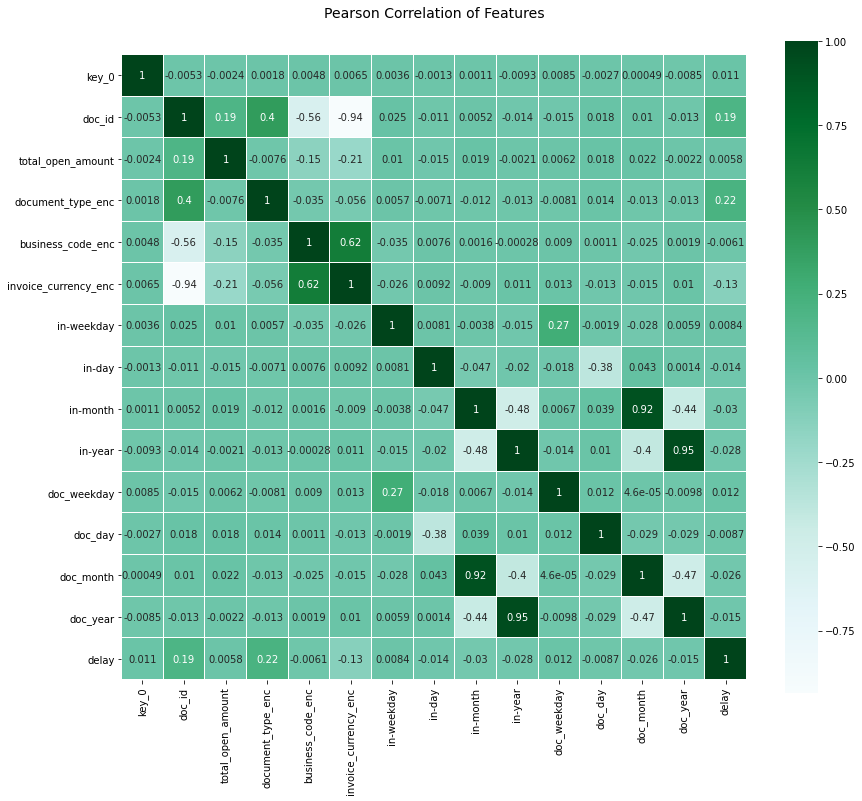

In [ ]:
#SEABORN CORRELATION HEATMAP

colormap = plt.cm.BuGn
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=14)
sns.heatmap(X_train.merge(y_train, on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
X_train

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
0,0200707822,1.929898e+09,18175.79,0,1,1,4,4,10,2019,3,19,9,2019
1,0200780383,1.929276e+09,2265.33,0,1,1,3,23,5,2019,2,8,5,2019
3,200769623,1.929069e+09,4742.40,0,1,1,4,19,4,2019,3,4,4,2019
4,0200779906,1.929907e+09,18197.21,0,1,1,2,9,10,2019,1,24,9,2019
5,0200592182,1.930509e+09,8226.78,0,1,1,5,8,2,2020,0,10,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,0200152991,1.929159e+09,449.08,0,1,1,3,2,5,2019,2,17,4,2019
34686,0200770567,1.929320e+09,41089.78,0,1,1,4,31,5,2019,3,16,5,2019
34687,0200726979,1.929542e+09,552.82,0,1,1,0,8,7,2019,6,23,6,2019
34688,200769623,1.929567e+09,36836.54,0,1,1,3,18,7,2019,2,3,7,2019


In [ ]:
#changing the data type of cust_number from object; errors='coerce' is used to ignore the operation if an invalid value is encountered
X_train['cust_number']=pd.to_numeric(X_train.cust_number,errors='coerce')

In [ ]:
X_train.cust_number.isnull().sum()

966

In [ ]:
#cust_number is a combination string alaphbatic and alphanumerical, hence should be converted to int datatype by mean calculation
X_train['cust_number'].mean() 

191342170.1073955

In [ ]:
t1 = X_train.copy()

#filling all the NaN values with 0 to calculate mean
t1['cust_number'] = t1['cust_number'].fillna(0)

In [ ]:
t1.cust_number.isnull().sum()

0

In [ ]:
t1['cust_number'].mean()

184596557.307726

In [ ]:
t1

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
0,200707822.0,1.929898e+09,18175.79,0,1,1,4,4,10,2019,3,19,9,2019
1,200780383.0,1.929276e+09,2265.33,0,1,1,3,23,5,2019,2,8,5,2019
3,200769623.0,1.929069e+09,4742.40,0,1,1,4,19,4,2019,3,4,4,2019
4,200779906.0,1.929907e+09,18197.21,0,1,1,2,9,10,2019,1,24,9,2019
5,200592182.0,1.930509e+09,8226.78,0,1,1,5,8,2,2020,0,10,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34685,200152991.0,1.929159e+09,449.08,0,1,1,3,2,5,2019,2,17,4,2019
34686,200770567.0,1.929320e+09,41089.78,0,1,1,4,31,5,2019,3,16,5,2019
34687,200726979.0,1.929542e+09,552.82,0,1,1,0,8,7,2019,6,23,6,2019
34688,200769623.0,1.929567e+09,36836.54,0,1,1,3,18,7,2019,2,3,7,2019


#**MODELLING**

In [ ]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score 

In [ ]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

*Linear Regression*

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(t1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
bm = LinearRegression()
bm.fit(t1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = bm.predict(t1)

In [ ]:
print(predicted)

[-0.09313175  0.14957021  0.66713481 ... -0.07583926  0.21055291
  0.02036998]


In [ ]:
#Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))

*Decision Tree Regressor*

In [ ]:
#Tree Based Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)
regressor.fit(t1, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
#Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
bm= DecisionTreeRegressor()
bm.fit(t1, y_train)

#Predicting the Test Set Results
predicted = bm.predict(t1)

In [ ]:
#Appending the Scores For Visualisation at a Later Part 
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))

*XGB Regressor*

In [ ]:
#Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
bm = xgb.XGBRegressor()
bm.fit(t1, y_train)

#Predicting the Test Set Results
predicted = bm.predict(t1)

[20:56:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))

In [ ]:
#Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [ ]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,98.132508,0.249745
1,Decision Tree Regressor,0.000182,0.999999
2,XGB Regressor,76.901980,0.412059


In [ ]:
#checking accuracy
linear_accuracy = round(regressor.score(t1, y_train)*100,2)
print(round(linear_accuracy,2),'%')

38.98 %


In [ ]:
X_train.dtypes

cust_number             float64
doc_id                  float64
total_open_amount       float64
document_type_enc         int64
business_code_enc         int64
invoice_currency_enc      int64
in-weekday                int64
in-day                    int64
in-month                  int64
in-year                   int64
doc_weekday               int64
doc_day                   int64
doc_month                 int64
doc_year                  int64
dtype: object

*Working on VAL dataset*

In [ ]:
X_val

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
34692,0200353024,1.929709e+09,2564.64,0,1,1,6,11,8,2019,1,6,8,2019
34694,0200705742,1.928554e+09,8636.91,0,1,1,3,31,1,2019,3,3,1,2019
34695,0200706844,1.928987e+09,36259.20,0,1,1,3,4,4,2019,2,20,3,2019
34699,0140104550,2.960596e+09,102235.81,0,0,0,5,7,12,2019,0,25,11,2019
34700,0200726979,1.930253e+09,159.94,0,1,1,6,22,12,2019,5,7,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,0200726979,1.929540e+09,195.37,0,1,1,5,29,6,2019,4,14,6,2019
42253,0200759878,1.929071e+09,87837.91,0,1,1,3,18,4,2019,2,3,4,2019
42254,0200794332,1.929968e+09,30220.01,0,1,1,1,22,10,2019,0,7,10,2019
42255,0200331749,1.929159e+09,275.49,0,1,1,2,1,5,2019,1,16,4,2019


In [ ]:
X_val['cust_number']=pd.to_numeric(X_val.cust_number,errors='coerce')

In [ ]:
X_val['cust_number'].mean() 

191551507.22675136

In [ ]:
d1_val = X_val.copy()
d1_val['cust_number'] = d1_val['cust_number'].fillna(0)

In [ ]:
d1_val

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
34692,200353024.0,1.929709e+09,2564.64,0,1,1,6,11,8,2019,1,6,8,2019
34694,200705742.0,1.928554e+09,8636.91,0,1,1,3,31,1,2019,3,3,1,2019
34695,200706844.0,1.928987e+09,36259.20,0,1,1,3,4,4,2019,2,20,3,2019
34699,140104550.0,2.960596e+09,102235.81,0,0,0,5,7,12,2019,0,25,11,2019
34700,200726979.0,1.930253e+09,159.94,0,1,1,6,22,12,2019,5,7,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,200726979.0,1.929540e+09,195.37,0,1,1,5,29,6,2019,4,14,6,2019
42253,200759878.0,1.929071e+09,87837.91,0,1,1,3,18,4,2019,2,3,4,2019
42254,200794332.0,1.929968e+09,30220.01,0,1,1,1,22,10,2019,0,7,10,2019
42255,200331749.0,1.929159e+09,275.49,0,1,1,2,1,5,2019,1,16,4,2019


In [ ]:
y_predict = base_model.predict(d1_val) 

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

8.65210138323903

In [ ]:
y_predict1 = regressor.predict(d1_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict1, squared=False)

8.628289429920349

In [ ]:
val_null = y_val[y_val==0]

In [ ]:
val_not_null = y_val[y_val != 0]

In [ ]:
met = pd.DataFrame(zip(y_predict, val_not_null), columns= ['Predicted','Actuals'])

In [ ]:
met

,Predicted,Actuals
0,3.203877,-3
1,-2.986430,-8
2,0.720022,6
3,4.791133,1
4,-0.329006,-9
...,...,...
4627,0.257198,59
4628,-1.159380,2
4629,-0.134271,-1
4630,-0.293580,5


In [ ]:
met.dtypes

Predicted    float64
Actuals        int64
dtype: object

In [ ]:
#Final mean
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

0.1858242215886475

*Working on TEST dataset to confirm that the model is not getting overfitted*

In [ ]:
X_test

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
42257,0140103496,1.991826e+09,25805.78,0,4,1,5,15,6,2019,2,1,5,2019
42258,0200744019,1.929765e+09,2307.31,0,1,1,3,5,9,2019,2,21,8,2019
42261,0200769623,1.929396e+09,9.70,0,1,1,3,13,6,2019,2,29,5,2019
42262,0100031704,1.930087e+09,72943.03,0,1,1,1,19,11,2019,0,4,11,2019
42263,0200769623,1.930558e+09,23094.13,0,1,1,6,8,3,2020,5,22,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,200331749,1.928967e+09,1884.47,0,1,1,1,9,4,2019,2,20,3,2019
49996,0200769623,1.929862e+09,51450.59,0,1,1,4,27,9,2019,3,12,9,2019
49997,0200774000,1.929044e+09,89734.43,0,1,1,4,12,4,2019,3,28,3,2019
49998,CCU013,1.929726e+09,106139.88,0,1,1,6,11,8,2019,6,11,8,2019


In [ ]:
X_test['cust_number']=pd.to_numeric(X_test.cust_number,errors='coerce')

In [ ]:
X_val['cust_number'].mean()

191551507.22675136

In [ ]:
d1_test = X_test.copy()
d1_test['cust_number'] = d1_test['cust_number'].fillna(0)

In [ ]:
d1_test

,cust_number,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
42257,140103496.0,1.991826e+09,25805.78,0,4,1,5,15,6,2019,2,1,5,2019
42258,200744019.0,1.929765e+09,2307.31,0,1,1,3,5,9,2019,2,21,8,2019
42261,200769623.0,1.929396e+09,9.70,0,1,1,3,13,6,2019,2,29,5,2019
42262,100031704.0,1.930087e+09,72943.03,0,1,1,1,19,11,2019,0,4,11,2019
42263,200769623.0,1.930558e+09,23094.13,0,1,1,6,8,3,2020,5,22,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,200331749.0,1.928967e+09,1884.47,0,1,1,1,9,4,2019,2,20,3,2019
49996,200769623.0,1.929862e+09,51450.59,0,1,1,4,27,9,2019,3,12,9,2019
49997,200774000.0,1.929044e+09,89734.43,0,1,1,4,12,4,2019,3,28,3,2019
49998,0.0,1.929726e+09,106139.88,0,1,1,6,11,8,2019,6,11,8,2019


In [ ]:
y_predict_test = regressor.predict(d1_test)
mean_squared_error(y_test, y_predict_test, squared=False)

9.569187715757067

#*Working on null-df dataset*

In [ ]:
null_df 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
2,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,NaT
8,CA02,100012991,CJR WH corporation,NaT,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1,NaT
11,U001,0200759878,SA co,NaT,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1,NaT
25,U001,0200772595,SAFEW co,NaT,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1,NaT
27,U001,0200772670,ASSOCIAT in,NaT,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200763489,GENERAL in,NaT,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1,NaT
49983,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1,NaT
49987,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1,NaT
49990,U001,0200936373,SUPE co,NaT,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1,NaT


In [ ]:
null_df.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9707
buisness_year                0
doc_id                       0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
total_open_amount            0
cust_payment_terms           0
isOpen                       0
delay                     9707
dtype: int64

In [ ]:
X_null_df = null_df.drop(['delay'],axis=1)
null_df.drop(['delay'], inplace =True,axis=1) #dropping from main test

In [ ]:
X_null_df = null_df.drop(['clear_date'],axis=1)
null_df.drop(['clear_date'], inplace =True,axis=1) #dropping from main test

In [ ]:
X_null_df.isna().sum()

business_code             0
cust_number               0
name_customer             0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
cust_payment_terms        0
isOpen                    0
dtype: int64

In [ ]:
X_null_df['due_in_date'] = pd.to_datetime(X_null_df['due_in_date'])

In [ ]:
X_null_df

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
2,U001,0200769623,WAL-MAR co,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1
8,CA02,100012991,CJR WH corporation,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1
11,U001,0200759878,SA co,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1
25,U001,0200772595,SAFEW co,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1
27,U001,0200772670,ASSOCIAT in,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49981,U001,0200763489,GENERAL in,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1
49983,U001,0200769623,WAL-MAR in,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1
49987,U001,0200769623,WAL-MAR us,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1
49990,U001,0200936373,SUPE co,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1


*Working on null-df dataset - FEATURE ENGINEERING*

In [ ]:
#document type
from sklearn.preprocessing import LabelEncoder
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_null_df['document type'])
X_null_df['document_type_enc'] = document_type_encoder.transform(X_null_df['document type'])

In [ ]:
X_null_df[['document_type_enc','document type']]

,document_type_enc,document type
2,0,RV
8,0,RV
11,0,RV
25,0,RV
27,0,RV
...,...,...
49981,0,RV
49983,0,RV
49987,0,RV
49990,0,RV


In [ ]:
X_null_df.drop(['document type'], axis =1,inplace=True)

In [ ]:
#business_code
from sklearn.preprocessing import LabelEncoder
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_null_df['business_code'])
X_null_df['business_code_enc'] = document_type_encoder.transform(X_null_df['business_code'])

In [ ]:
X_null_df[['business_code_enc','business_code']]

,business_code_enc,business_code
2,1,U001
8,0,CA02
11,1,U001
25,1,U001
27,1,U001
...,...,...
49981,1,U001
49983,1,U001
49987,1,U001
49990,1,U001


In [ ]:
X_null_df.drop(['business_code'], axis=1, inplace=True)

In [ ]:
#invoice_currency
from sklearn.preprocessing import LabelEncoder
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_null_df['invoice_currency'])
X_null_df['invoice_currency_enc'] =invoice_currency_encoder.transform(X_null_df['invoice_currency'])

In [ ]:
X_null_df[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
2,1,USD
8,0,CAD
11,1,USD
25,1,USD
27,1,USD
...,...,...
49981,1,USD
49983,1,USD
49987,1,USD
49990,1,USD


In [ ]:
X_null_df.drop(['invoice_currency'], axis=1, inplace=True)

In [ ]:
#dropping columns that won't have much significance in the calculation
X_null_df.drop(['cust_payment_terms','isOpen'], axis =1,inplace=True)

In [ ]:
X_null_df['in-weekday'] = X_null_df['due_in_date'].dt.weekday 
X_null_df['in-day'] = X_null_df['due_in_date'].dt.day
X_null_df['in-month'] = X_null_df['due_in_date'].dt.month
X_null_df['in-year'] = X_null_df['due_in_date'].dt.year

In [ ]:
X_null_df.drop(['due_in_date'], axis=1, inplace=True)

In [ ]:
X_null_df['doc_weekday'] = X_null_df['document_create_date.1'].dt.weekday 
X_null_df['doc_day'] = X_null_df['document_create_date.1'].dt.day
X_null_df['doc_month'] = X_null_df['document_create_date.1'].dt.month
X_null_df['doc_year'] = X_null_df['document_create_date.1'].dt.year

In [ ]:
X_null_df.drop(['document_create_date.1'], axis=1, inplace=True)

In [ ]:
X_null_df

,cust_number,name_customer,buisness_year,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
2,0200769623,WAL-MAR co,2020.0,1.930823e+09,48706.82,0,1,1,6,10,5,2020,5,25,4,2020
8,100012991,CJR WH corporation,2020.0,2.960634e+09,44533.51,0,0,0,6,17,5,2020,1,5,5,2020
11,0200759878,SA co,2020.0,1.930674e+09,46631.90,0,1,1,5,4,4,2020,4,20,3,2020
25,0200772595,SAFEW co,2020.0,1.930585e+09,99823.52,0,1,1,1,17,3,2020,0,2,3,2020
27,0200772670,ASSOCIAT in,2020.0,1.930647e+09,3287.94,0,1,1,5,28,3,2020,4,13,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,0200763489,GENERAL in,2020.0,1.930610e+09,17885.83,0,1,1,2,13,5,2020,0,9,3,2020
49983,0200769623,WAL-MAR in,2020.0,1.930611e+09,3228.13,0,1,1,6,22,3,2020,5,7,3,2020
49987,0200769623,WAL-MAR us,2020.0,1.930571e+09,13826.48,0,1,1,5,14,3,2020,4,28,2,2020
49990,0200936373,SUPE co,2020.0,1.930705e+09,16901.34,0,1,1,5,11,4,2020,4,27,3,2020


In [ ]:
X_null_df.drop(['buisness_year'], axis=1, inplace=True) 

In [ ]:
X_null_df['cust_number']=pd.to_numeric(X_null_df.cust_number, errors='coerce')

In [ ]:
X_null_df['cust_number'].mean()

192555272.1690347

In [ ]:
d1_null_df = X_null_df.copy()
d1_null_df['cust_number'] = d1_null_df['cust_number'].fillna(0)

In [ ]:
d1_null_df

,cust_number,name_customer,doc_id,total_open_amount,document_type_enc,business_code_enc,invoice_currency_enc,in-weekday,in-day,in-month,in-year,doc_weekday,doc_day,doc_month,doc_year
2,200769623.0,WAL-MAR co,1.930823e+09,48706.82,0,1,1,6,10,5,2020,5,25,4,2020
8,100012991.0,CJR WH corporation,2.960634e+09,44533.51,0,0,0,6,17,5,2020,1,5,5,2020
11,200759878.0,SA co,1.930674e+09,46631.90,0,1,1,5,4,4,2020,4,20,3,2020
25,200772595.0,SAFEW co,1.930585e+09,99823.52,0,1,1,1,17,3,2020,0,2,3,2020
27,200772670.0,ASSOCIAT in,1.930647e+09,3287.94,0,1,1,5,28,3,2020,4,13,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,200763489.0,GENERAL in,1.930610e+09,17885.83,0,1,1,2,13,5,2020,0,9,3,2020
49983,200769623.0,WAL-MAR in,1.930611e+09,3228.13,0,1,1,6,22,3,2020,5,7,3,2020
49987,200769623.0,WAL-MAR us,1.930571e+09,13826.48,0,1,1,5,14,3,2020,4,28,2,2020
49990,200936373.0,SUPE co,1.930705e+09,16901.34,0,1,1,5,11,4,2020,4,27,3,2020


In [ ]:
name_null_df = d1_null_df.drop(['name_customer'], axis=1, inplace=True)

In [ ]:
d1_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9707 entries, 2 to 49993
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_number           9707 non-null   float64
 1   doc_id                9707 non-null   float64
 2   total_open_amount     9707 non-null   float64
 3   document_type_enc     9707 non-null   int64  
 4   business_code_enc     9707 non-null   int64  
 5   invoice_currency_enc  9707 non-null   int64  
 6   in-weekday            9707 non-null   int64  
 7   in-day                9707 non-null   int64  
 8   in-month              9707 non-null   int64  
 9   in-year               9707 non-null   int64  
 10  doc_weekday           9707 non-null   int64  
 11  doc_day               9707 non-null   int64  
 12  doc_month             9707 non-null   int64  
 13  doc_year              9707 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 1.1 MB


In [ ]:
#Getting info of the main train
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27401 entries, 0 to 34689
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_number           27401 non-null  float64
 1   doc_id                27401 non-null  float64
 2   total_open_amount     27401 non-null  float64
 3   document_type_enc     27401 non-null  int64  
 4   business_code_enc     27401 non-null  int64  
 5   invoice_currency_enc  27401 non-null  int64  
 6   in-weekday            27401 non-null  int64  
 7   in-day                27401 non-null  int64  
 8   in-month              27401 non-null  int64  
 9   in-year               27401 non-null  int64  
 10  doc_weekday           27401 non-null  int64  
 11  doc_day               27401 non-null  int64  
 12  doc_month             27401 non-null  int64  
 13  doc_year              27401 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.1 MB


#***FINAL PREDICTION***

In [ ]:
f_result = regressor.predict(d1_null_df) #final result

In [ ]:
f_result = pd.Series(f_result,name='delay')

In [ ]:
f_result

0      -0.858808
1       3.394948
2      -0.858808
3       0.809797
4       0.809797
          ...   
9702   -0.858808
9703   -0.858808
9704   -0.858808
9705    0.809797
9706   -0.858808
Name: delay, Length: 9707, dtype: float64

In [ ]:
null_df.reset_index(drop=True,inplace=True)

In [ ]:
Final = null_df.merge(f_result, on = d1_null_df.index)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,2,U001,0200769623,WAL-MAR co,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,-0.858808
1,8,CA02,100012991,CJR WH corporation,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1,3.394948
2,11,U001,0200759878,SA co,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1,-0.858808
3,25,U001,0200772595,SAFEW co,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1,0.809797
4,27,U001,0200772670,ASSOCIAT in,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1,0.809797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,49981,U001,0200763489,GENERAL in,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1,-0.858808
9703,49983,U001,0200769623,WAL-MAR in,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1,-0.858808
9704,49987,U001,0200769623,WAL-MAR us,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1,-0.858808
9705,49990,U001,0200936373,SUPE co,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1,0.809797


In [ ]:
#Final['delay']= pd
Final['delay'] = Final['delay'].apply(int)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,2,U001,0200769623,WAL-MAR co,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,0
1,8,CA02,100012991,CJR WH corporation,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1,3
2,11,U001,0200759878,SA co,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1,0
3,25,U001,0200772595,SAFEW co,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1,0
4,27,U001,0200772670,ASSOCIAT in,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,49981,U001,0200763489,GENERAL in,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1,0
9703,49983,U001,0200769623,WAL-MAR in,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1,0
9704,49987,U001,0200769623,WAL-MAR us,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1,0
9705,49990,U001,0200936373,SUPE co,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1,0


In [ ]:
Final['payment_date'] = Final['due_in_date'].combine(Final['delay'], lambda x,y: x + pd.DateOffset(days=int(np.ceil(y)))) 

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay,payment_date
0,2,U001,0200769623,WAL-MAR co,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,0,2020-05-10
1,8,CA02,100012991,CJR WH corporation,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1,3,2020-05-20
2,11,U001,0200759878,SA co,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1,0,2020-04-04
3,25,U001,0200772595,SAFEW co,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1,0,2020-03-17
4,27,U001,0200772670,ASSOCIAT in,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1,0,2020-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,49981,U001,0200763489,GENERAL in,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1,0,2020-05-13
9703,49983,U001,0200769623,WAL-MAR in,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1,0,2020-03-22
9704,49987,U001,0200769623,WAL-MAR us,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1,0,2020-03-14
9705,49990,U001,0200936373,SUPE co,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1,0,2020-04-11


In [ ]:
#bucketisation function

def bucket(value):
    if value>60:
        return ">60 days"
    elif value>45:
        return "46-60 days"
    elif value>30:
        return "31-45 days"
    elif value>15:
        return "16-30 days"
    elif value>=0:
        return "0-15 days"
    elif value<0:
        return "PAID"

In [ ]:
#bucketisation of data

X_train["Aging_Bucket"] = y_train.apply(bucket)
X_val["Aging_Bucket"] = y_val.apply(bucket)
X_test["Aging_Bucket"] = y_test.apply(bucket)

Final["Aging_Bucket"] = Final['delay'].apply(bucket)

In [ ]:
#now storing values in the original data which was provide and have null values
null_df["predicted_payment_date"] = Final["payment_date"]
null_df["Aging_Bucket"] = Final["Aging_Bucket"]

In [ ]:
null_df.shape

(9707, 14)

In [ ]:
null_df['Aging_Bucket'].nunique()

6

In [ ]:
#final presentation for those data which have null values in clear_date 
null_df

,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,predicted_payment_date,Aging_Bucket
0,U001,0200769623,WAL-MAR co,2020.0,1.930823e+09,2020-04-25,2020-05-10,USD,RV,48706.82,NAH4,1,2020-05-10,0-15 days
1,CA02,100012991,CJR WH corporation,2020.0,2.960634e+09,2020-05-05,2020-05-17,CAD,RV,44533.51,CA10,1,2020-05-20,0-15 days
2,U001,0200759878,SA co,2020.0,1.930674e+09,2020-03-20,2020-04-04,USD,RV,46631.90,NAH4,1,2020-04-04,0-15 days
3,U001,0200772595,SAFEW co,2020.0,1.930585e+09,2020-03-02,2020-03-17,USD,RV,99823.52,NAA8,1,2020-03-17,0-15 days
4,U001,0200772670,ASSOCIAT in,2020.0,1.930647e+09,2020-03-13,2020-03-28,USD,RV,3287.94,NAU5,1,2020-03-28,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,U001,0200763489,GENERAL in,2020.0,1.930610e+09,2020-03-09,2020-05-13,USD,RV,17885.83,NAGD,1,2020-05-13,0-15 days
9703,U001,0200769623,WAL-MAR in,2020.0,1.930611e+09,2020-03-07,2020-03-22,USD,RV,3228.13,NAH4,1,2020-03-22,0-15 days
9704,U001,0200769623,WAL-MAR us,2020.0,1.930571e+09,2020-02-28,2020-03-14,USD,RV,13826.48,NAH4,1,2020-03-14,0-15 days
9705,U001,0200936373,SUPE co,2020.0,1.930705e+09,2020-03-27,2020-04-11,USD,RV,16901.34,NAA8,1,2020-04-11,0-15 days
